

# Підготовка даних до аналізу






<h2>Мета</h2>

Ознайомитись з методикою первинної обробки даних. Після завершення цієї лабораторної роботи ви зможете:

* Досліджувати структуру завантажених даних
* Виправляти формати даних
* Знаходити та заповнювати пропуски в даних
* Знаходити викиди та некоректні значення
* Будувати прості візуалізації

Приблизний час виконання: **90** хвилин


# <h2>Зміст</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3>Завдання для тренування</h3>
<ul>
    <li><a href="#data_acquisition">Завантаження даних</a>
    <li><a href="#identify_handle_missing_values">Виявлення та обробка відсутніх значень</a>
    <li><a href="#data_standardization">Стандартизація даних</a></li>
    <li><a href="#data_normalization">Нормалізація даних (центрування/масштабування)</a></li>
    <li><a href="#binning">Групування даних</a></li>
    <li><a href="#indicator">Індикаторні змінні</a></li>
</ul>
    
<h3>Завдання, що оцінюються</h3>
<ul>
    <li><a href="#task1">завдання 1</a></li>
    <li><a href="#task2">завдання 2</a></li>
    <li><a href="#task3">завдання 3</a></li>
    <li><a href="#task4">завдання 4</a></li>
    <li><a href="#task5">завдання 5</a></li>
    <li><a href="#task6">додаткове завдання </a></li>

</ul>
    
</div>

<hr>


<a name="data_acquisition"></a>
## <h2>Завантаження даних з файлу або за URL</h2>


<h3>Джерело даних</h3>
<p>
Існують різні формати для набору даних: .csv, .json, .xlsx  etc. Набір даних можна зберігати в різних місцях: на вашій локальній машині або онлайн.<br>

У нашому випадку набір даних "Automobile Dataset" є онлайн-джерелом у форматі CSV (значення, розділені комами).
<ul>
    <li>Джерело даних: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2022-01-01" target="_blank">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a></li>
    <li>Тип даних: csv</li>
</ul>
</p>



<h3>Імпорт бібліотек</h3>

Бібліотека Pandas Library — це корисний інструмент, який дозволяє читати різні набори даних у датафрейм.

In [1]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2

In [2]:
import pandas as pd
import matplotlib.pylab as plt

<p>
Використаємо функцію <code>pandas.read_csv()</code> для читання csv файлу. У дужках поміщаємо шлях до файлу разом із лапками, щоб pandas читала файл у датафрейм із цієї адреси. Шляхом до файлу може бути URL-адреса або адреса локального файлу. Адресу датасету зручно записати до змінної "filename". <br>

Ви також можете призначити набір даних будь-якій створеній змінній.
</p>

<h3>Завантаження даних за URL</h3>

Потрібний нам датасет зберігається як IBM Cloud object. Запишемо URL датасету до змінної "filename".


In [3]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

<h3>Читання даних</h3>

Використовуємо метод <code>read_csv()</code> з Pandas для завантаження даних. Оскільки дані не містять заголовків, можемо додати аргумент <code>headers = None</code> в метод <code>read_csv()</code> щоб pandas не встановлювала перший рядок автоматично як заголовок.


In [4]:
df = pd.read_csv(filename, header=None)

<h2>Для чого роблять попередню обробку даних?</h2>

Попередня обробка даних - це процес перетворення даних з їх початкового вигляду у вигляд, зручний для аналізу.

Після прочитання набору даних можемо використати метод <code>dataframe.head(n)</code>, щоб перевірити n верхніх рядків датафрейму, де n — ціле число. На відміну від <code>dataframe.head(n)</code>, <code>dataframe.tail(n)</code> покаже вам n нижніх рядків.

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<p>
Подивіться на набір даних. Pandas автоматично встановлює заголовок із цілим числом, починаючи з 0.
</p>
<p>
Щоб краще описати наші дані, можемо додати заголовок. Ця інформація доступна за адресою:  <a href="https://archive.ics.uci.edu/ml/datasets/Automobile?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2022-01-01" target="_blank">https://archive.ics.uci.edu/ml/datasets/Automobile</a>.
</p>
<p>
Отже, ми повинні додати заголовки вручну.
</p>
<p>
Спочатку створюємо список 'headers', який містить усі назви стовпців по порядку.
Потім використовуємо <code>dataframe.columns = headers</code> для заміни заголовків створеним нами списком.
</p>

Створюємо Python list 'headers', що містить заголовки стовпчиків - назви ознак.


In [6]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Замінюємо заголовки та повторно перевіряємо наш датафрейм:


In [7]:
df.columns = headers
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


У відображеному фрагменті бачимо кілька знаків питання; це відсутні значення, які можуть перешкодити подальшому аналізу.

<b>Що робити з відсутніми значеннями?</b>

<ol>
    <li>Виявити всі відсутні значення</li>
    <li>Замінити значення або видалити спостереження чи ознаки</li>
    <li>Скоригувати формат даних</li>
</ol>


<a name="identify_handle_missing_values"></a>
## <h2>Виявлення та обробка відсутніх значень</h2>




<h3 id="identify_missing_values">Виявлення відсутніх значень</h3>

Використовуємо метод <b>info()</b> для відображення основної інформації про датафрейм.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

 Використовуємо метод <b>describe()</b> для відображення більш детальної інформації про датафрейм.


In [9]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


<p>
Бачимо статистичний підсумок усіх стовпців із числовим типом (int, float).<br>

Наприклад, ознака 'symboling' має 205 одиниць, середнє значення цього стовпця становить 0.83, стандартне відхилення — 1.25, мінімальне значення — -2, 25-й процентиль — 0, 50-й процентиль — 1, 75-й процентиль — 2 і максимальне значення 3.
<br><br>

Але що, якщо ми також хочемо перевірити всі стовпці, включаючи ті, які мають тип об’єкт?
<br>
Можна додати аргумент <code>include = "all"</code> у дужку.

</p>

In [10]:
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


<p>
Тепер він надає статистичний підсумок усіх стовпців, включаючи атрибути типу object, і можемо побачити скільки там унікальних значень, яке з них є верхнім значенням і частоту верхнього значення в стовпцях типу object.<br>

Деякі значення в таблиці відображаються як "NaN". Це тому, що ці числа недоступні для певного типу стовпця.<br>
</p>

<h4>Заміна "?" на NaN</h4>

В датасеті про автомобілі відсутні дані позначені знаком "?".
Ми замінимо "?" на NaN (Not a Number), Python за замовчуванням позначає відсутні дані саме так для пришвидшення обчислень та зручності. Використовуємо функцію:
 <pre>.replace(A, B, inplace = True) </pre>

для заміни A на B.


In [11]:
import numpy as np

# заміна "?" на NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Інколи потрібно виконати заміну не всього значення, а лише його частини. Наприклад, замінити коми на крапки в числах, щоб потім змінити тип даних на числовий. Тоді спочатку змінюємо тип на строковий, виконуємо заміну ком на крапки, і знову міняємо тип на числовий:
 <pre>.astype("str").str.replace(',', '.').astype("float") </pre>


<h4>Оцінка відсутніх даних</h4>

Відсутні значення конвертуються за замовчуванням. Існує два методи для виявлення відсутніх даних:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>

Результатом є логічне значення, яке вказує, чи значення, яке передається в аргумент, насправді є відсутніми даними.


In [12]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" означає відсутнє значення, а "False" означає, що значення присутнє в наборі даних.

<h4>Підрахунок відсутніх значень в кожному стовпчику</h4>
<p>
Використовуючи цикл <code>for</code> у Python, ми можемо швидко визначити кількість пропущених значень у кожному стовпці. У тілі циклу <code>for</code> метод <code>.value_counts()</code> підраховує кількість значень "True".    
</p>


In [13]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

Виходячи з наведеного вище підсумку, кожен стовпець містить 205 рядків даних і сім стовпців містять відсутні дані:
<ol>
    <li>"normalized-losses": 41 відсутнє значення</li>
    <li>"num-of-doors": 2 відсутніх значення</li>
    <li>"bore": 4 відсутніх значення</li>
    <li>"stroke" : 4 відсутніх значення</li>
    <li>"horsepower": 2 відсутніх значення</li>
    <li>"peak-rpm": 2 відсутніх значення</li>
    <li>"price": 4 відсутніх значення</li>
</ol>


<h3 id="deal_missing_values">Обробка відсутніх значень</h3>

<b>Як обробити відсутні значення?</b>

<ol>
    <li>Видалити дані<br>
        a. Видалити весь рядок (спостереження)<br>
        b. Видалити весь стовпчик (ознаку)
    </li>
    <li>Замінити дані<br>
        a. Замінити середнім значенням<br>
        b. Замінити модою (значенням, що зустрічається найчастіше)<br>
        c. Замінити значенням, порахованим за якоюсь іншою фунцією
    </li>
</ol>


Весь стовпчик слід видаляти, лише якщо більшість записів у ньому відсутні. У нашому наборі даних жоден зі стовпців не є настільки порожнім, щоб повністю його видалити.
Ми маємо певну свободу у виборі методу заміни даних; однак деякі методи можуть здатися більш розумними, ніж інші. Застосуємо наступні методи до вказаних стовпців:

<b>Заміна середнім значенням:</b>
<ul>
    <li>'normalized-losses': 41 відсутнє значення, замінимо їх середнім значенням</li>
    <li>'stroke': 4 відсутніх значення, замінимо їх середнім значенням</li>
    <li>'bore': 4 відсутніх значення, замінимо їх середнім значенням</li>
    <li>'horsepower': 2 відсутніх значення, замінимо їх середнім значенням</li>
    <li>'peak-rpm': 2 відсутніх значення, замінимо їх середнім значенням</li>
</ul>

<b>Заміна модою:</b>
<ul>
    <li>'num-of-doors': 2 відсутніх значення, замінимо їх значенням "four".
        <ul>
            <li>Причина: 84% седанів - чотиридверні. Оскільки чотири двері найчастіше зустрічаються, це найбільш ймовірне значення</li>
        </ul>
    </li>
</ul>

<b>Видалити весь рядок:</b>
<ul>
    <li>'price': 4 відсутніх значення, просто видалимо весь рядок
        <ul>
            <li>Причина: ціна - це те, що ми хочемо передбачити. Будь-яке введення даних без інформації про ціну не можна використовувати для прогнозу; тому будь-який рядок без даних про ціну нам не корисний</li>
        </ul>
    </li>
</ul>


<h4>Обчислення середнього значення для ознаки 'normalized-losses'  </h4>


In [14]:
avg_norm_loss = df['normalized-losses'].astype('float').mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


<h4>Заміна "NaN" на середнє значення ознаки 'normalized-losses'</h4>


In [15]:
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)

<h4>Обчислення середнього значення для ознаки 'bore'</h4>


In [16]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


<h4>Заміна "NaN" на середнє значення ознаки 'bore'</h4>


In [17]:
df['bore'].replace(np.nan, avg_bore, inplace=True)

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання  #1: </h2>

<p>Спираючись на попередні приклади, замініть NaN для ознаки 'stroke' середніми значеннями.</p>
</div>


In [18]:
# Розрахунок середнього значення для ознаки "stroke"
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

# Заміна NaN середнім значенням ознаки "stroke"
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

Average of stroke: 3.255422885572139


<h4>Обчислення середнього значення для ознаки 'horsepower'</h4>


In [19]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


<h4>Заміна "NaN" на середнє значення ознаки 'horsepower'</h4>


In [20]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

<h4>Обчислення середнього значення для ознаки 'peak-rpm'</h4>


In [21]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


<h4>Заміна "NaN" на середнє значення ознаки 'peak-rpm'</h4>


In [22]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

<h4>Заміна пропусків в 'num-of-doors' значенням, що найчастіше зустрічається в датасеті</h4>


Щоб побачити, які значення присутні в певному стовпці, можемо використати метод <code>.value_counts()</code>:

In [23]:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

Бачимо, що чотири двері є найпоширенішим типом. Також можемо використовувати метод <code>.idxmax()</code>, щоб автоматично обчислити найпоширеніший тип:


In [24]:
df['num-of-doors'].value_counts().idxmax()

'four'

Процедура заміни дуже схожа на ту, яку робили раніше:


In [25]:
# заміна пропусків в 'num-of-doors' значенням, що найчастіше зустрічається в датасеті
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

<h4>Видалення рядків, де відсутні значення 'price'</h4>


Нарешті, видалимо всі рядки, які не містять даних про ціни:


In [26]:
# просто видаляємо весь рядок з NaN в "price"
df.dropna(subset=['price'], axis=0, inplace=True)

# оновлюємо індекси, тому що видалили два рядки
df.reset_index(drop=True, inplace=True)

In [27]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Тепер маємо датасет без пропущених значень.


<h3 id="correct_data_format">Виправлення форматів даних</h3>

<p>Останнім етапом очищення даних є перевірка, що всі дані мають правильний формат (int, float, text або інші).</p>

В Pandas використовуємо:
<p><b>.dtype()</b> щоб перевірити тип даних</p>
<p><b>.astype()</b> щоб змінити тип даних</p>


<h4>Переглянемо типи даних для кожного стовпця</h4>


In [28]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>Як бачимо, деякі стовпці мають неправильний тип даних. Числові змінні повинні мати тип 'float' або 'int', а змінні з рядками, наприклад категорії, повинні мати тип 'object'. Наприклад, змінні 'bore' і 'stroke' є числовими значеннями, які описують двигуни, тому ми очікуємо, що вони будуть типу 'float' або 'int'; однак вони відображаються як тип 'object'. Потрібно перетворити типи даних у відповідний формат для кожного стовпця за допомогою методу <code>astype()</code>.</p>


<h4>Перетворення типів даних у правильний формат</h4>


In [29]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

Переглянемо типи стовпців після перетворення


In [30]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Тепер нарешті отримали очищений набір даних без пропущених значень з усіма даними у належному форматі.


<a name="data_standardization"></a>
## <h2>Стандартизація даних</h2>

<p>
Дані зазвичай збираються з різних джерел у різних форматах.</p>
    
<b>Що таке стандартизація?</b>
<p>Стандартизація — це процес перетворення даних у загальний формат, що дозволяє досліднику робити значуще порівняння. (Стандартизація даних також є терміном для певного типу нормалізації даних, коли ми віднімаємо середнє значення та ділимо на стандартне відхилення.)
</p>

Приклад:  Перетворення mpg на л/100км.</p>
<p>У нашому наборі даних стовпці споживання палива 'city-mpg' і 'highway-mpg' представлено в одиницях mpg (миль на галон). Припустімо, що розробляємо програму в країні, яка приймає стандарт споживання палива л/100 км.</p>
<p>Потрібно буде застосувати <b>перетворення даних</b>, щоб перетворити милі на галон у л/100 км.</p>    


<p>Формула перетворення одиниць має вигляд:<p>
L/100km = 235 / mpg
<p>Ми можемо виконувати багато математичних операцій безпосередньо в Pandas.</p>


In [31]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [32]:
# перетворюємо mpg на л/100км за допомогою математичної операції (235 ділимо на mpg)
df['city-L/100km'] = 235/df['city-mpg']

# перевіряємо трансформовані дані
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання  #2: </h2>

<p>Відповідно до прикладу вище, перетворіть милі на галон на л/100 км у стовпці 'highway-mpg' і змініть назву стовпця на 'highway-L/100km'.</p>
</div>


In [33]:
df["highway-mpg"] = 235/df["highway-mpg"]
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


<a name="data_normalization"></a>
## <h2>Нормалізація даних</h2>

<b>Навіщо нормалізація?</b>
<p>Нормалізація — це процес перетворення значень кількох змінних у подібний діапазон. Типові нормалізації включають масштабування змінної, щоб середнє значення змінної дорівнювало 0, масштабування змінної, щоб дисперсія дорівнювала 1, або масштабування змінної, щоб значення змінної змінювалися в межах від 0 до 1.
</p>

<b>Приклад</b>
<p>Щоб продемонструвати нормалізацію, масштабуємо ознаки 'length', 'width' та 'height'.</p>
<p><b>Ціль:</b> хочемо нормалізувати ці змінні, щоб їхні значення були в діапазоні від 0 до 1</p>
<p><b>Підхід:</b> заміняємо вихідне значення на (первинне значення)/(максимальне значення)</p>


In [34]:
# заміняємо вихідне значення на (первинне значення)/(максимальне значення)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання #3: </h2>

<p>Спираючись на попередній приклад, нормалізуйте ознаку 'height'.</p>
</div>


In [35]:
df['height'] = df['height']/df['height'].max()
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Бачимо, що нормалізували 'length', 'width' та 'height' в діапазоні [0,1].

<a name="binning"></a>
## <h2>Групування даних</h2>

<b>Навіщо групувати?</b>
<p>
    Групування — це процес перетворення неперервних числових змінних у дискретні категоріальні групи-"bins" для згрупованого аналізу.
</p>

<b>Приклад: </b>
<p>В нашому датасеті 'horsepower' — це змінна з дійсними значенням у діапазоні від 48 до 288 і має 59 унікальних значень. Що, якщо нас цікавить лише різниця в ціні між автомобілями з високою, середньою та малою потужністю (3 типи)? Чи можемо ми зібрати їх у три групи-"bins", щоб спростити аналіз?</p>

<p>Ми використаємо метод pandas <code>cut()</code>, щоб розділити стовпець 'horsepower' на 3 групи.</p>


<h3>Приклад групування даних Pandas</h3>


 Перетворимо дані в правильний формат:


In [36]:
df['horsepower']=df['horsepower'].astype(int, copy=True)

Давайте побудуємо гістограму 'horsepower', щоб побачити, як виглядає розподіл.

Text(0.5, 1.0, 'horsepower bins')

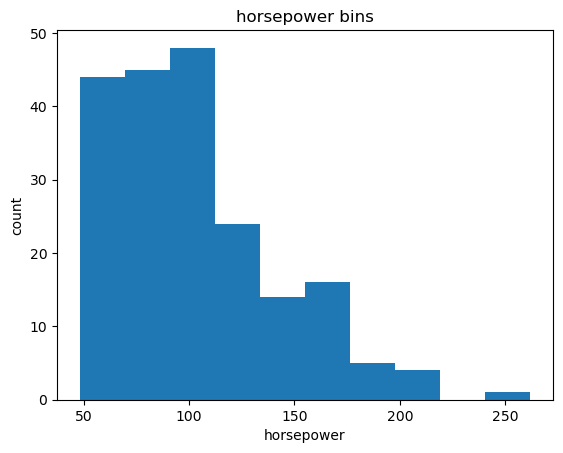

In [37]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df['horsepower'])

# вказуємо підписи осей x/y та заголовок діаграми
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>Нам потрібні 3 групи однакового розміру, тому використовуємо функцію з numpy <code>linspace(start_value, end_value, numbers_generated</code>.</p>
<p>Оскільки хочемо включити мінімальне значення 'horsepower', встановлюємо <code>start_value = min(df['horsepower'])</code>.</p>
<p>Оскільки хочемо включити максимальне значення 'horsepower', встановлюємо <code>end_value = max(df['horsepower'])</code>.</p>
<p>Оскільки будуємо 3 групи однакової довжини, має бути 4 розділювачі, отже <code>numbers_generated = 4</code>.</p>


Створюємо масив груп від мінімального до максимального значення, використовуючи параметри, вказані вище. Значення визначатимуть, коли закінчується одна група і починається інша.

In [38]:
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

 Задаємо назви груп:


In [39]:
group_names = ["Low", "Medium", "High"]

Застосовуємо функцію <code>cut()</code>, щоб визначити, до якої групи належить кожне значення `df['horsepower']`.

In [40]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Подивимося кількість транспортних засобів у кожній групі:


In [41]:
df['horsepower-binned'].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

Побудуємо стовпчасту діаграму для порівняння кількості елементів в групах:


Text(0.5, 1.0, 'horsepower bins')

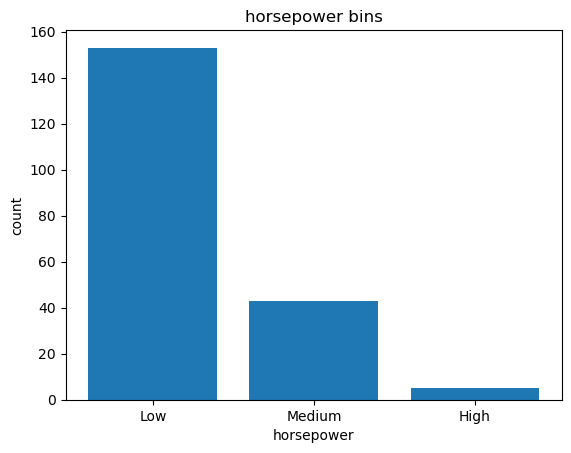

In [42]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df['horsepower-binned'].value_counts())

# вказуємо підписи осей x/y та заголовок діаграми
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>
    Уважно подивіться на датафрейм вище. Ви побачите, що в останньому стовпчику наведено групи для 'horsepower' на основі 3 категорій ("Low", "Medium" та "High"). Ми успішно зменшили кількість інтервалів з 59 до 3.
</p>


<h3>Візуалізація груп</h3>
Зазвичай для візуалізації розподілу груп використовується гістограма.

Text(0.5, 1.0, 'horsepower bins')

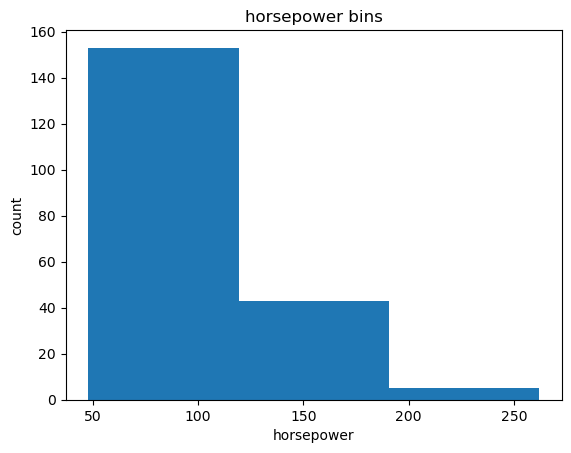

In [43]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# будуємо гістограму для ознаки 'horsepower' з кількістю груп bins = 3
plt.pyplot.hist(df['horsepower'], bins = 3)

# вказуємо підписи осей x/y та заголовок діаграми
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Графік вище показує результат групування для ознаки 'horsepower'.

<a name="indicator"></a>
## <h2>Індикаторні змінні (Dummy Variable)</h2>

<b>Що таке індикаторна змінна?</b>
<p>
    Змінна-індикатор (або фіктивна змінна) — це числова змінна, яка використовується для позначення категорій. Їх називають "dummies" (фіктивними), тому що самі числа не мають внутрішнього значення.
</p>

<b>Чому використовуємо змінні-індикатори?</b>
<p>
    Змінні-індикатори потрібні, щоб можна було використовувати категоріальні змінні для регресійного аналізу.
</p>

<b>Приклад</b>
<p>
   Бачимо, що ознака 'fuel-type' має два унікальних значення: "gas" або "diesel". Регресія не розуміє слів, розуміє лише числа. Щоб використовувати цей атрибут у регресійному аналізі, перетворюємо 'fuel-type' на індикаторні змінні.
</p>

<p>
    Ми будемо використовувати метод pandas <b>get_dummies()</b> для призначення числових значень різним категоріям типу палива.
</p>


In [44]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

Отримуємо індикаторні змінні та створюємо з них датафрейм "dummy_variable_1":

In [45]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


Змінюємо назви стовпців для ясності:


In [46]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


В датафреймі стовпець 'fuel-type' тепер має значення для "gas" і "diesel" як 0 і 1.

In [47]:
# об'єднуємо датафрейми "df" та "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

# видаляємо вихідну ознаку 'fuel-type' з "df"
df.drop('fuel-type', axis = 1, inplace=True)

In [48]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,False,True
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,False,True
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,False,True


Останні два стовпці тепер представляють індикаторні змінні для ознаки 'fuel-type'. Зараз усі вони 0 і 1.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання  #4: </h2>

<p>Спираючись на попередній приклад, створіть індикаторні змінні для ознаки 'aspiration'</p>
</div>


In [49]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


 <div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання  #5: </h2>

<p>Об’єднайте новий датафрейм із вихідним датафреймом, а потім видаліть ознаку 'aspiration'.</p>
</div>


In [50]:
# об'єднати датафрейми
df = pd.concat([df, dummy_variable_2], axis=1)

# видалити оригінальну ознаку "aspiration" з "df"
df.drop('aspiration', axis = 1, inplace=True)

Використайте метод <b>describe()</b> для відображення інформації про датафрейм. Переконайтесь, що вся попередня обробка даних завершена.


In [51]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,8.044957,13207.129353,9.944145
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,1.840739,7947.066342,2.534599
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,7.833333,10295.000000,9.791667
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923


## <h2>Збереження даних</h2>
<p>
Pandas дозволяє нам зберігати набір даних у форматі CSV. Використовуючи метод <b>dataframe.to_csv()</b>, ви можете додати шлях до файлу та назву разом із лапками в дужках.
</p>
<p>
Наприклад, якщо ви хочете зберегти фрейм даних "df" як "auto1.csv", можете використати наведений нижче синтаксис, де <code>index = False</code > означає, що назви рядків не будуть записані.
</p>



In [52]:
df.to_csv("auto1.csv", index=False)

<h3>Read/Save інших форматів даних</h3>

| Data Formate |        Read       |            Save |
| ------------ | :---------------: | --------------: |
| csv          |  `pd.read_csv()`  |   `df.to_csv()` |
| json         |  `pd.read_json()` |  `df.to_json()` |
| excel        | `pd.read_excel()` | `df.to_excel()` |
| hdf          |  `pd.read_hdf()`  |   `df.to_hdf()` |
| sql          |  `pd.read_sql()`  |   `df.to_sql()` |
| ...          |        ...        |             ... |

<a name="task"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>





1. Скачати дані із файлу <a href="https://drive.google.com/file/d/1Vz4Kkbu4HVMuBKsOz_5gq3C8jYYXA89d/view?usp=drive_link" target="_blank">'Data2.csv'</a>. Записати дані у dataframe. Дослідити структуру даних.
2. Виправити помилки в даних.
3. Заповнити пропуски.
4. Додати стовпчик із щільністю населення.
5. Побудувати діаграми розмаху та гістограми.


<a name="task2"></a> <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h2 id="task2"> Завдання  1: </h2>
<p>Дослідити структуру даних</p>
</div>



Зчитую дані з файлу у датафрейм

In [53]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

filename = "Data2.csv"

df = pd.read_csv(filename, sep=';', encoding='cp1252')
df.head(10)


,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,"561,7787463",34656032.0,"9809,225",652860
1,Albania,Europe & Central Asia,"4124,98239",2876101.0,"5716,853",28750
2,Algeria,Middle East & North Africa,"3916,881571",40606052.0,"145400,217",2381740
3,American Samoa,East Asia & Pacific,"11834,74523",55599.0,NaN,200
4,Andorra,Europe & Central Asia,"36988,62203",77281.0,"462,042",470
5,Angola,Sub-Saharan Africa,"3308,700233",28813463.0,"34763,16",1246700
6,Antigua and Barbuda,Latin America & Caribbean,"14462,17628",100963.0,"531,715",440
7,Argentina,Latin America & Caribbean,"12440,32098",43847430.0,"204024,546",2780400
8,Armenia,Europe & Central Asia,"3614,688357",2924816.0,"5529,836",29740
9,Aruba,Latin America & Caribbean,NaN,104822.0,"872,746",180


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
DATA_PATH = 'data/Data2.csv'

# Зчитуємо файл із заданим розділяючим символом ";"
df = pd.read_csv(DATA_PATH, sep=';')

'''
Зауваження: попередній код зчитування з файлу підходить для
файлів з кодуванням utf-8. Проте файл Data2.csv спочатку мав інше
кодування. Дане кодування потрібно вказати в якості параметру:
    
'''

df = pd.read_csv(DATA_PATH, sep=';', encoding='cp1252')


```
</details>




Досліджую структуру даних


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    object 
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    object 
 5   Area            217 non-null    object 
dtypes: float64(1), object(5)
memory usage: 10.3+ KB


In [55]:
df.describe(include = 'all')

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
count,217,217,190,2.160000e+02,205,217
unique,217,7,190,NaN,202,213
top,Afghanistan,Europe & Central Asia,"561,7787463",NaN,"6318,241",460
freq,1,58,1,NaN,2,3
mean,NaN,NaN,NaN,3.432256e+07,NaN,NaN
std,NaN,NaN,NaN,1.347600e+08,NaN,NaN
min,NaN,NaN,NaN,1.109700e+04,NaN,NaN
25%,NaN,NaN,NaN,7.900265e+05,NaN,NaN
50%,NaN,NaN,NaN,6.221590e+06,NaN,NaN
75%,NaN,NaN,NaN,2.350337e+07,NaN,NaN


In [56]:
# Оцінка відсутніх даних
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Country Name
Country Name
False    217
Name: count, dtype: int64

Region
Region
False    217
Name: count, dtype: int64

GDP per capita
GDP per capita
False    190
True      27
Name: count, dtype: int64

Populatiion
Populatiion
False    216
True       1
Name: count, dtype: int64

CO2 emission
CO2 emission
False    205
True      12
Name: count, dtype: int64

Area
Area
False    217
Name: count, dtype: int64



In [57]:
df.dtypes

Country Name       object
Region             object
GDP per capita     object
Populatiion       float64
CO2 emission       object
Area               object
dtype: object

Бачу наступні проблеми в даних:
1. Коми замість крапок в дробових числах.
2. Проблема з типом даних у стовпці GDP per capita, CO2 emission,  Area.
3. Помилка в назві ствопця "Populatiion".
4. Відсутність значень у стовпці GDP per capita(27), Populatiion(1), CO2 emission(12).


<a name="task2"></a> <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2"> Завдання  #2: </h2>

<p>Виправити помилки в даних</p>
</div>


<b>Проблема 1.</b>
<p>
    Для виправлення заміню коми на крапки в стовпцях GDP per capita,  CO2 emission та Area.
</p>

In [58]:
df['GDP per capita'] = df['GDP per capita'].str.replace(',', '.')
df['CO2 emission'] = df['CO2 emission'].str.replace(',', '.')
df['Area'] = df['Area'].str.replace(',', '.')

df.head(100)

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,561.7787463,34656032.0,9809.225,652860
1,Albania,Europe & Central Asia,4124.98239,2876101.0,5716.853,28750
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217,2381740
3,American Samoa,East Asia & Pacific,11834.74523,55599.0,NaN,200
4,Andorra,Europe & Central Asia,36988.62203,77281.0,462.042,470
...,...,...,...,...,...,...
95,Italy,Europe & Central Asia,30661.22181,60600590.0,320411.459,301340
96,Jamaica,Latin America & Caribbean,4878.575791,2881355.0,7422.008,10990
97,Japan,East Asia & Pacific,38900.56931,126994511.0,1214048.358,377962
98,Jordan,Middle East & North Africa,4087.937517,9455802.0,26450.071,89320


<b>Проблема 2.</b>
<p>
    Для виправлення зроблю наступне замінимо типи даних для GDP per capita, CO2 emission та Area на float, а для Populatiion на  int.
</p>

In [59]:
# Replace NaN values in 'Populatiion' with -1
df['Populatiion'].fillna(-1, inplace=True)

df["Populatiion"] = df["Populatiion"].astype("int")

df[["GDP per capita", "CO2 emission", "Area"]] = df[["GDP per capita", "CO2 emission", "Area"]].astype("float")
df.head(10)


,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032,9809.225,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101,5716.853,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052,145400.217,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599,NaN,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281,462.042,470.0
5,Angola,Sub-Saharan Africa,3308.700233,28813463,34763.160,1246700.0
6,Antigua and Barbuda,Latin America & Caribbean,14462.176280,100963,531.715,440.0
7,Argentina,Latin America & Caribbean,12440.320980,43847430,204024.546,2780400.0
8,Armenia,Europe & Central Asia,3614.688357,2924816,5529.836,29740.0
9,Aruba,Latin America & Caribbean,NaN,104822,872.746,180.0


<b>Проблема 3.</b>
<p>
    Для виправлення зроблю наступне перейменую стовпець Populatiion
</p>

In [60]:
# Rename the "Populatiion" column to "Population"
df.rename(columns={'Populatiion': 'Population'}, inplace=True)
df.head(5)

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032,9809.225,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101,5716.853,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052,145400.217,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599,NaN,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281,462.042,470.0


<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3"> Завдання  #3: </h2>

<p>Заповнити пропуски</p>
</div>


Заповнювати пропуски для ознаки GDP per capita та CO2 emission буду замінювати середнім, щоб уникнути відхилень даних, Populatiion - видалимо, бо серед кількість рядків з відсутнім записом лише 1.

In [61]:
import numpy as np

avg_gdp = df['GDP per capita'].astype('float').mean(axis=0)
df["GDP per capita"].replace(np.nan, avg_gdp, inplace=True)

co2_avg = df['CO2 emission'].astype('float').mean(axis=0)
df["CO2 emission"].replace(np.nan, co2_avg, inplace=True)

# видалимо рядки де Population = -1, оскільки NaN в попередньому завданні було замінено на -1 в цьому стовпці
df = df[df['Population'] != -1]

df = df.dropna(subset=['Population'])

df.head(5)


,Country Name,Region,GDP per capita,Population,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032,9809.225000,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101,5716.853000,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052,145400.217000,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599,165114.116337,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281,462.042000,470.0


Досліджую структуру даних, чи всі пропуски заповнено


In [62]:
# Повторна оцінка відсутніх даних

missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")


Country Name
Country Name
False    216
Name: count, dtype: int64

Region
Region
False    216
Name: count, dtype: int64

GDP per capita
GDP per capita
False    216
Name: count, dtype: int64

Population
Population
False    216
Name: count, dtype: int64

CO2 emission
CO2 emission
False    216
Name: count, dtype: int64

Area
Area
False    216
Name: count, dtype: int64



 <a name="task4"></a>
 <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4"> Завдання  #4: </h2>

<p>Додати стовпчик із щільністю населення</p>
</div>


Щільність населення обчислюється як відношення населення до площі, додам новий стовпчик Population Density.

In [63]:
df['Population Density'] = df['Population'] / df['Area'].astype(float)

df.head(5)

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population Density
0,Afghanistan,South Asia,561.778746,34656032,9809.225000,652860.0,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101,5716.853000,28750.0,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052,145400.217000,2381740.0,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599,165114.116337,200.0,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281,462.042000,470.0,164.427660


<a name="task5"></a>
 <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5"> Завдання  #5: </h2>

<p>Побудувати діаграми розмаху та гістограми</p>
</div>


Для побудови графіків скористайтесь бібліотекою Matplotlib. Спробуйте погратись з кольорами, розмірами та підписами.


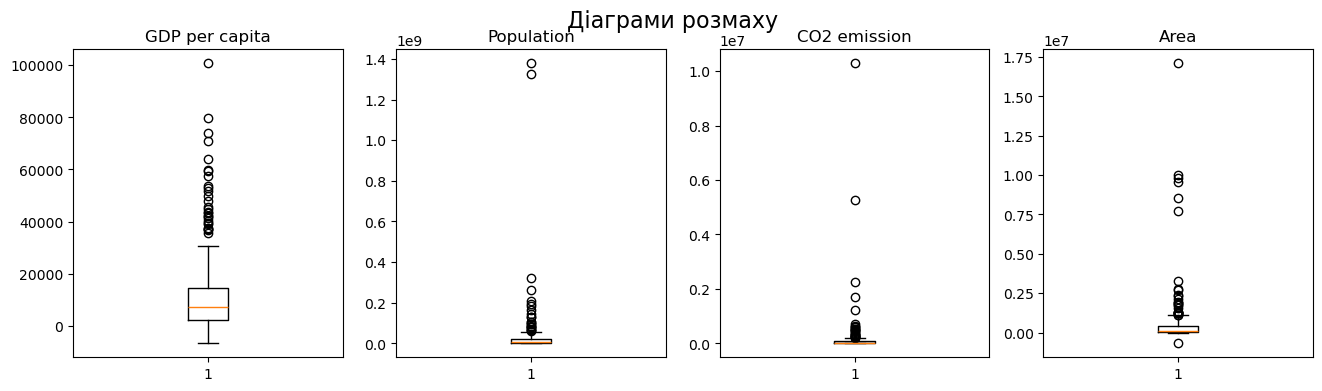

In [64]:
import matplotlib.pyplot as plt
    
# діаграми розмаху для "GDP per capita", "Population", "CO2 emission" та "Area"

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

fig.suptitle('Діаграми розмаху', fontsize=16)

axs[0].set_title('GDP per capita')
axs[0].boxplot(df['GDP per capita'])

axs[1].set_title('Population')
axs[1].boxplot(df['Population'])

axs[2].set_title('CO2 emission')
axs[2].boxplot(df['CO2 emission'])

axs[3].set_title('Area')
axs[3].boxplot(df['Area'])

plt.show()

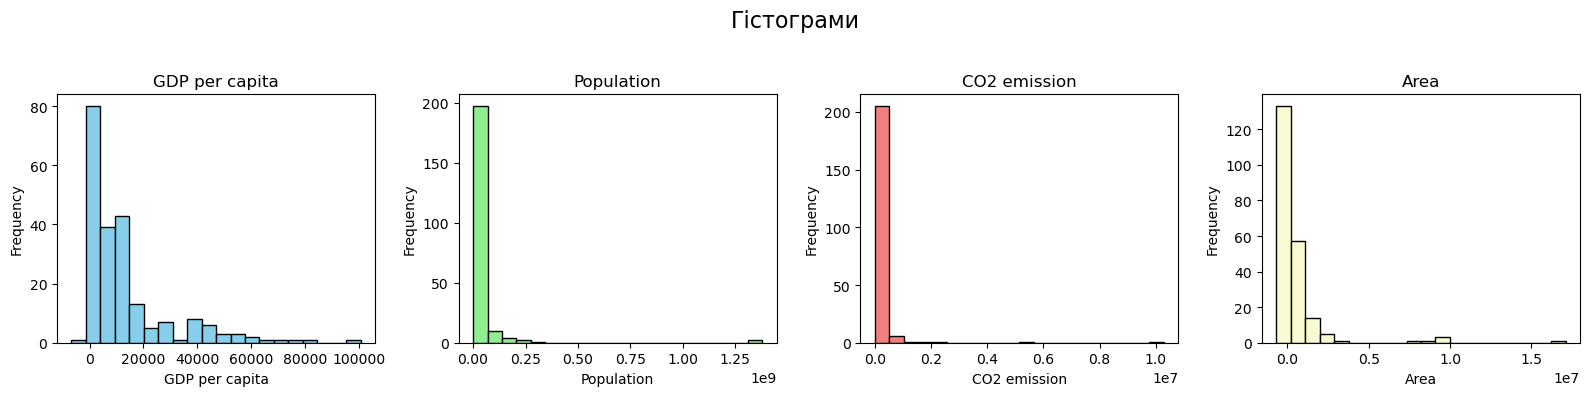

In [65]:
import matplotlib.pyplot as plt
    
# гістограми для "GDP per capita", "Population", "CO2 emission" та "Area"

fig, axs = plt.subplots(1, 4, figsize=(16, 4)) 

fig.suptitle('Гістограми', fontsize=16)

axs[0].set_title('GDP per capita')  
axs[0].hist(df['GDP per capita'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_xlabel('GDP per capita')
axs[0].set_ylabel('Frequency')

axs[1].set_title('Population')  
axs[1].hist(df['Population'], bins=20, color='lightgreen', edgecolor='black')
axs[1].set_xlabel('Population')
axs[1].set_ylabel('Frequency')

axs[2].set_title('CO2 emission')  
axs[2].hist(df['CO2 emission'], bins=20, color='lightcoral', edgecolor='black')
axs[2].set_xlabel('CO2 emission')
axs[2].set_ylabel('Frequency')

axs[3].set_title('Area')  
axs[3].hist(df['Area'], bins=20, color='lightgoldenrodyellow', edgecolor='black')
axs[3].set_xlabel('Area')
axs[3].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# Імпортуємо бібліотеку Matplotlib
import matplotlib.pyplot as plt
    
# діаграми розмаху для "GDP per capita", "Population", "CO2 emission" та "Area"

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

fig.suptitle('Діаграми розмаху', fontsize=16)

axs[0].set_title('GDP per capita')
axs[0].boxplot(df['GDP per capita'])

axs[1].set_title('Population')
axs[1].boxplot(df['Population'])

axs[2].set_title('CO2 emission')
axs[2].boxplot(df['CO2 emission'])

axs[3].set_title('Area')
axs[3].boxplot(df['Area'])

plt.show()

```
</details>




<a name="task6"></a>
 <div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Дайте відповіді на питання</p>
</div>


1. Яка країна має найбільший ВВП на людину (GDP per capita)?
2. Яка країна має найменшу площу?
3. Знайдіть країну з найбільшою щільністю населення у світі? У Європі та центральній Азії?
4. Покажіть топ 5 країн та 5 останніх країн по ВВП на людину.



<details><summary>Натисніть тут, щоб побачити підказку</summary>
    
Скористайтесь методами <code>loc()</code> для повернення зрізу датафрейму, <code>idxmax()</code> для повернення номера рядка з найбільшим значенням якогось показника у стовпці та <code>idxmin()</code> для повернення номера рядка з найменшим значенням якогось показника у стовпці
    
```python
df.loc[df['GDP per capita'].idxmax()]

```
    
Гарно оформити виведення інформації допоможе <code>print()</code>  
```python
print('\n' + df.loc[df['GDP per capita'].idxmax(), 'Country Name'] + ' має найбільший ВВП на людину')
```   
  
</details>


In [66]:
country_with_max_gdp_per_capita = df.loc[df['GDP per capita'].idxmax(), 'Country Name']
print(f"The country with the highest GDP per capita is: {country_with_max_gdp_per_capita}")

The country with the highest GDP per capita is: Luxembourg


In [67]:
country_with_min_area = df.loc[df['Area'].idxmin(), 'Country Name']
print(f"The country with the smallest Area is: {country_with_min_area}")

The country with the smallest Area is: Myanmar


In [68]:
max_density_worldwide = df.loc[df['Population Density'].idxmax(), 'Country Name']
print(f"The country with the highest population density worldwide is: {max_density_worldwide}")

The country with the highest population density worldwide is: Macao SAR, China


In [69]:
europe_df = df[df['Region'] == 'Europe & Central Asia']

max_density_europe = europe_df.loc[europe_df['Population Density'].idxmax(), 'Country Name']
print(f"The country with the highest population density in Europe & Central Asia is: {max_density_europe}")

The country with the highest population density in Europe & Central Asia is: Monaco


In [70]:
# топ-5 країн за ВВП на людину
top5_gdp_per_capita = df.nlargest(5, 'GDP per capita')
print("Top 5 countries by GDP per capita:")
print(top5_gdp_per_capita[['Country Name', 'GDP per capita']])

Top 5 countries by GDP per capita:
         Country Name  GDP per capita
115        Luxembourg    100738.68420
188       Switzerland     79887.51824
116  Macao SAR, China     74017.18471
146            Norway     70868.12250
92            Ireland     64175.43824


In [71]:
# останні 5 країн за ВВП на людину
bottom5_gdp_per_capita = df.nsmallest(5, 'GDP per capita')
print("Bottom 5 countries by GDP per capita:")
print(bottom5_gdp_per_capita[['Country Name', 'GDP per capita']])

Bottom 5 countries by GDP per capita:
                 Country Name  GDP per capita
56         Dominican Republic    -6722.223536
31                    Burundi      285.727442
119                    Malawi      300.307665
134                Mozambique      382.069330
37   Central African Republic      382.213174


Збережіть дані у новий файл 'clean_data2.csv':


In [72]:
df.to_csv('clean_data2.csv', index=False)

<h2>Виконала студентка групи ІП-21  <br>Гордич Оксана</h2>


В теоретичній частині роботи використано елементи курсу "Data Analysis with Python" від IBM Corporation, автор
<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2022-01-01" target="_blank">Joseph Santarcangelo</a>


